<a href="https://colab.research.google.com/github/flavio641/Modelos_Aprendizados_Maquinas/blob/main/ModeloClassifica%C3%A7%C3%A3oMulticlasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/content/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


### **Separação da variáveis preditivas e variável respostas**


In [5]:
x = df.drop('fetal_health', axis= 1)
y = df.fetal_health

In [6]:
y.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [7]:
y.value_counts() / y.shape[0]

1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: fetal_health, dtype: float64

# **Divisão em treino e teste**

In [9]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size= 0.30)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 1_000, max_depth= 8, n_jobs= -1)

In [12]:
rf.fit(x_treino, y_treino)

RandomForestClassifier(max_depth=8, n_estimators=1000, n_jobs=-1)

# **Score Multiclasse**

In [13]:
rf.predict_proba(x_teste)

array([[0.74227279, 0.06797348, 0.18975373],
       [0.99182441, 0.00493371, 0.00324189],
       [0.9940224 , 0.00485084, 0.00112676],
       ...,
       [0.99093848, 0.00750155, 0.00155997],
       [0.9866752 , 0.01052914, 0.00279566],
       [0.04433375, 0.03377683, 0.92188942]])

In [15]:
pd.DataFrame(rf.predict_proba(x_teste), columns=[
             'Score Saudável',
             'Score Suspeito',
             'Score Doente'
])

,Score Saudável,Score Suspeito,Score Doente
0,0.742273,0.067973,0.189754
1,0.991824,0.004934,0.003242
2,0.994022,0.004851,0.001127
3,0.945066,0.043361,0.011573
4,0.990723,0.008617,0.000660
...,...,...,...
633,0.987256,0.009990,0.002754
634,0.947775,0.051653,0.000572
635,0.990938,0.007502,0.001560
636,0.986675,0.010529,0.002796


In [17]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_teste==1,rf.predict_proba(x_teste)[:,0])

0.988430611785875

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_teste==2,rf.predict_proba(x_teste)[:,1])

0.9712190082644627

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_teste==3,rf.predict_proba(x_teste)[:,2])

0.9961033382425135

# **Comparar com histogramas**

Text(0.5, 1.0, 'Score Saudável')

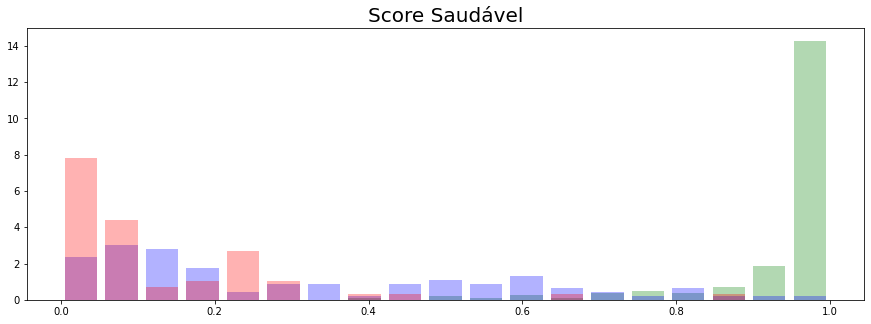

In [22]:
pred_saudavel = rf.predict_proba(x_teste,)[:,0]
pred_suspeito = rf.predict_proba(x_teste,)[:,1]
pred_doente = rf.predict_proba(x_teste,)[:,2]

bins = np.linspace(0,1,20)
plt.figure(figsize=(15,5))
plt.hist(pred_saudavel[y_teste==1], bins= bins, density= True, color= 'g',alpha=.3,rwidth= .8)
plt.hist(pred_saudavel[y_teste==2], bins= bins, density= True, color= 'b',alpha=.3,rwidth= .8)
plt.hist(pred_saudavel[y_teste==3], bins= bins, density= True, color= 'r',alpha=.3,rwidth= .8);
plt.title('Score Saudável', fontsize= 20)

Text(0.5, 1.0, 'Score Suspeito')

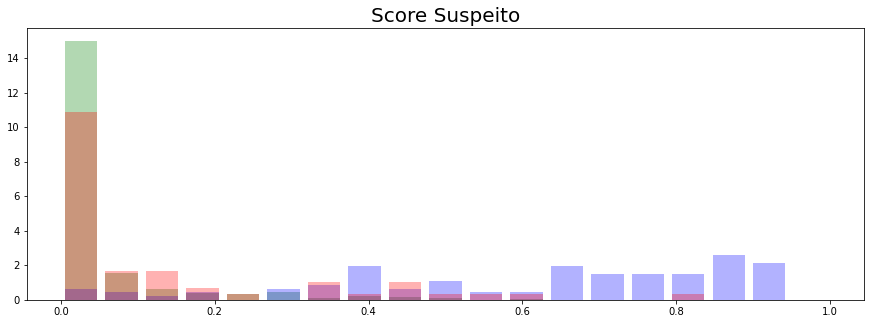

In [23]:
pred_saudavel = rf.predict_proba(x_teste,)[:,0]
pred_suspeito = rf.predict_proba(x_teste,)[:,1]
pred_doente = rf.predict_proba(x_teste,)[:,2]

bins = np.linspace(0,1,20)
plt.figure(figsize=(15,5))
plt.hist(pred_suspeito[y_teste==1], bins= bins, density= True, color= 'g',alpha=.3,rwidth= .8)
plt.hist(pred_suspeito[y_teste==2], bins= bins, density= True, color= 'b',alpha=.3,rwidth= .8)
plt.hist(pred_suspeito[y_teste==3], bins= bins, density= True, color= 'r',alpha=.3,rwidth= .8);
plt.title('Score Suspeito', fontsize= 20)

Text(0.5, 1.0, 'Score Doente')

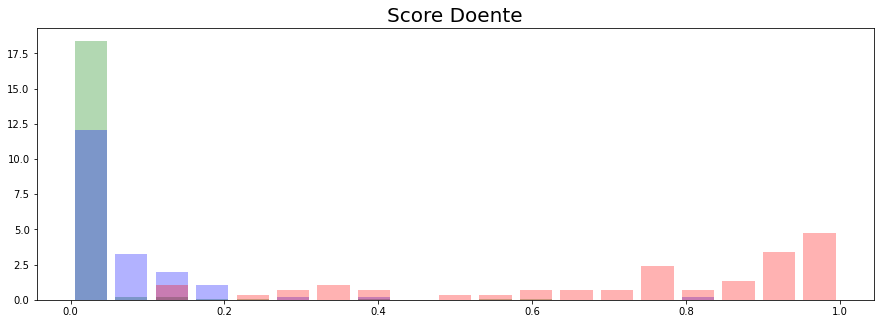

In [24]:
pred_saudavel = rf.predict_proba(x_teste,)[:,0]
pred_suspeito = rf.predict_proba(x_teste,)[:,1]
pred_doente = rf.predict_proba(x_teste,)[:,2]

bins = np.linspace(0,1,20)
plt.figure(figsize=(15,5))
plt.hist(pred_doente[y_teste==1], bins= bins, density= True, color= 'g',alpha=.3,rwidth= .8)
plt.hist(pred_doente[y_teste==2], bins= bins, density= True, color= 'b',alpha=.3,rwidth= .8)
plt.hist(pred_doente[y_teste==3], bins= bins, density= True, color= 'r',alpha=.3,rwidth= .8);
plt.title('Score Doente', fontsize= 20)

Text(0.5, 1.0, 'Púlblico Saudável')

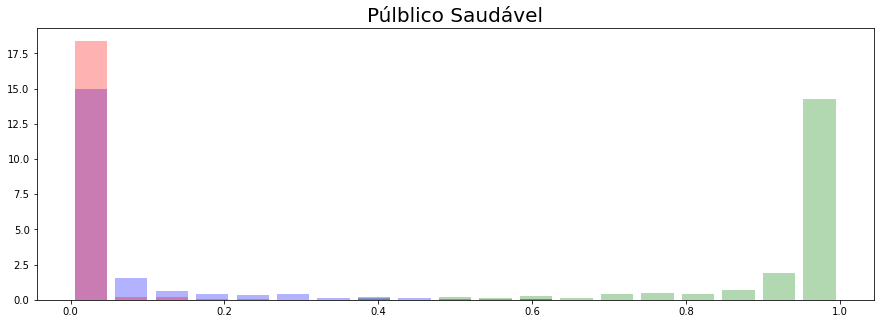

In [25]:
pred_saudavel = rf.predict_proba(x_teste,)[:,0]
pred_suspeito = rf.predict_proba(x_teste,)[:,1]
pred_doente = rf.predict_proba(x_teste,)[:,2]

bins = np.linspace(0,1,20)
plt.figure(figsize=(15,5))
plt.hist(pred_saudavel[y_teste==1], bins= bins, density= True, color= 'g',alpha=.3,rwidth= .8)
plt.hist(pred_suspeito[y_teste==1], bins= bins, density= True, color= 'b',alpha=.3,rwidth= .8)
plt.hist(pred_doente[y_teste==1], bins= bins, density= True, color= 'r',alpha=.3,rwidth= .8);
plt.title('Púlblico Saudável', fontsize= 20)

Text(0.5, 1.0, 'Púlblico Suspeito')

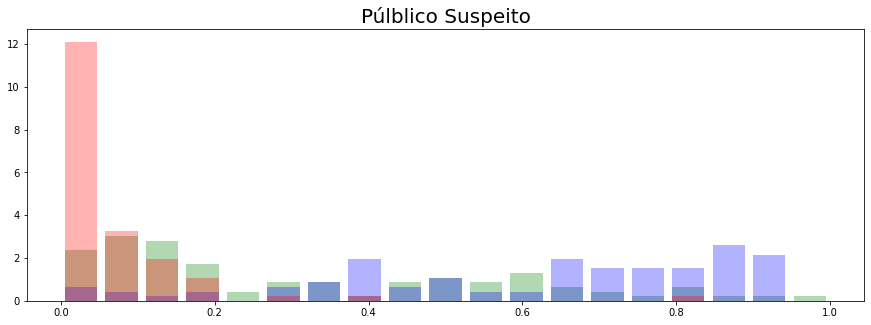

In [28]:
pred_saudavel = rf.predict_proba(x_teste,)[:,0]
pred_suspeito = rf.predict_proba(x_teste,)[:,1]
pred_doente = rf.predict_proba(x_teste,)[:,2]

bins = np.linspace(0,1,20)
plt.figure(figsize=(15,5))
plt.hist(pred_saudavel[y_teste==2], bins= bins, density= True, color= 'g',alpha=.3,rwidth= .8)
plt.hist(pred_suspeito[y_teste==2], bins= bins, density= True, color= 'b',alpha=.3,rwidth= .8)
plt.hist(pred_doente[y_teste==2], bins= bins, density= True, color= 'r',alpha=.3,rwidth= .8);
plt.title('Púlblico Suspeito', fontsize= 20)

Text(0.5, 1.0, 'Púlblico Doente')

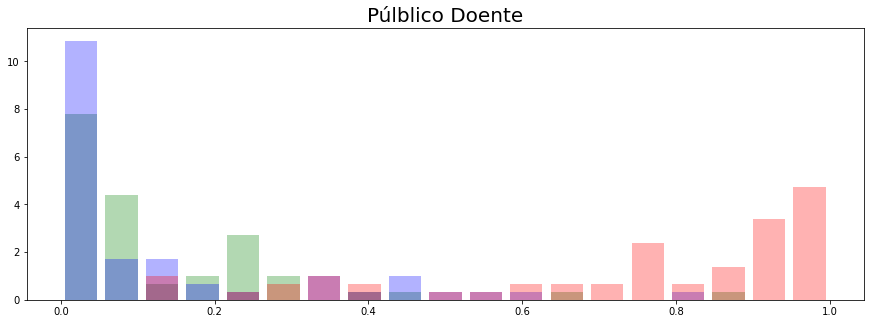

In [31]:
pred_saudavel = rf.predict_proba(x_teste,)[:,0]
pred_suspeito = rf.predict_proba(x_teste,)[:,1]
pred_doente = rf.predict_proba(x_teste,)[:,2]

bins = np.linspace(0,1,20)
plt.figure(figsize=(15,5))
plt.hist(pred_saudavel[y_teste==3], bins= bins, density= True, color= 'g',alpha=.3,rwidth= .8)
plt.hist(pred_suspeito[y_teste==3], bins= bins, density= True, color= 'b',alpha=.3,rwidth= .8)
plt.hist(pred_doente[y_teste==3], bins= bins, density= True, color= 'r',alpha=.3,rwidth= .8);
plt.title('Púlblico Doente', fontsize= 20)